In [48]:
# Import the packages and classes needed for this example:
import matplotlib.pyplot as plt
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [49]:
file = open("heart.csv", 'r')
csv_reader = csv.reader(file)

header = next(csv_reader)
#print(header)

X, y = [], []
for features in csv_reader:
  y.append(features.pop(-1))
  X.append(features)

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

In [50]:
model = LogisticRegression(max_iter=1000,
                           random_state=43,
                           fit_intercept=True)
model.fit(X, y);

Minimum MSE Value: 0.1287



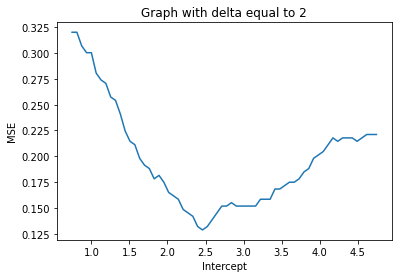

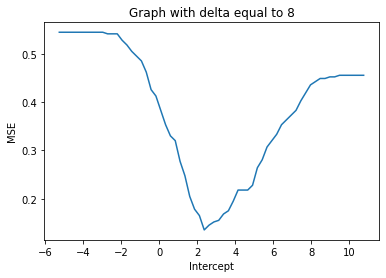

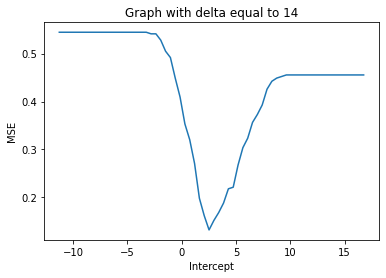

In [51]:
intercept_base = model.intercept_
deltas = [2, 8, 14]
num_points = 64

delta1_intercepts = np.linspace(intercept_base-deltas[0], intercept_base+deltas[0], num_points)
delta2_intercepts = np.linspace(intercept_base-deltas[1], intercept_base+deltas[1], num_points)
delta3_intercepts = np.linspace(intercept_base-deltas[2], intercept_base+deltas[2], num_points)
deltas_intercepts = [delta1_intercepts, delta2_intercepts, delta3_intercepts]

mse_all = []
for delta_intercepts in deltas_intercepts:
  mse_currently = []

  for intercept in delta_intercepts:
    model.intercept_ = intercept
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mse_currently.append(mse)

  mse_currently = np.array(mse_currently, dtype=float)
  mse_all.append(mse_currently)

min_error = np.min(mse_all)
print(f"Minimum MSE Value: {min_error:.4f}")
print()

for i in range(len(mse_all)):
  plt.title(f"Graph with delta equal to {deltas[i]}")
  plt.xlabel("Intercept")
  plt.ylabel("MSE")

  plt.plot(deltas_intercepts[i], mse_all[i])

  #plt.xticks(np.linspace(-11, 17, 9))
  #plt.yticks(np.round(np.linspace(0.18, 0.55, 9), 2))

  plt.show();